# Coin Toss Experiment — LLN & CLT

## Purpose
Hi! I'm Muhammed İkbal. This project demonstrates, in one go,  
the **Law of Large Numbers (LLN)** and the **Central Limit Theorem (CLT)**  
using a simple coin-toss experiment.  

You press Enter to advance through increasing sample sizes:  
**N = 10², 10³, 10⁴, 10⁵**.  

For each N, you get two visual panels:  
- **(A) LLN** — Running mean of a single length-N sequence of Bernoulli(0.5) trials.  
  You will see the running average stabilizing around *p = 0.5* as n grows.  
- **(B) CLT** — Sampling distribution of p-hat across M independent experiments.  
  Over the histogram we overlay the Normal approximation  
  $\mathcal{N}(p, p(1-p)/n)$.  

The whole point is to let you see both laws in action.

---

## How to Run
1. Install dependencies:
   pip install numpy matplotlib
2. Run the script:
   python coin-ex.ipynb
3. Press Enter to cycle through N, or type q to quit.

## Mathematical Commentary — by Muhammed İkbal Yılmaz

### Setup
Let $X_i \sim \text{Bernoulli}(p)$, $i=1,2,\dots,n$, independent.  
We observe heads (1) or tails (0).  
The sample mean is:
$$
\hat{p}_n = \frac{1}{n}\sum_{i=1}^n X_i
$$

---

### Law of Large Numbers (LLN)
As $n$ increases along a single realization:
$$
\hat{p}_n \;\to\; p \quad \text{(almost surely).}
$$

In practice, you will see the running mean curve stabilize around $p=0.5$.  
This addresses **convergence of one path**.

---

### Central Limit Theorem (CLT)
Across many independent experiments (each of size $n$):
$$
\sqrt{n}\,\big(\hat{p}_n - p\big) \;\;\Rightarrow\;\; \mathcal{N}\!\left(0,\;p(1-p)\right)
$$

Equivalently:
$$
\hat{p}_n \;\approx\; \mathcal{N}\!\left(p,\;\frac{p(1-p)}{n}\right).
$$

Hence, the histogram of $\hat{p}$ looks Gaussian with variance shrinking as $1/n$. The overlaid bell curve is $\mathcal{N}(p,\,p(1-p)/n)$. This addresses **distribution across many paths**.

---

### Why Both?
- **LLN** explains stabilization of the average in a single long run.  
- **CLT** explains the spread of averages across many independent runs at fixed \(n\).  

Seeing them together avoids the common confusion between convergence of a sequence (LLN) and the distributional shape of sample averages (CLT).



Coin Toss Experiment — LLN & CLT (Author: Muhammed İkbal Yılmaz)
Press <Enter> to run the next N, or type 'q' to quit.



Ready for N = 10 tosses (M = 1000 experiments for CLT). Press <Enter>, or 'q' to quit:  



Results for N = 10: Heads = 4, Tails = 6



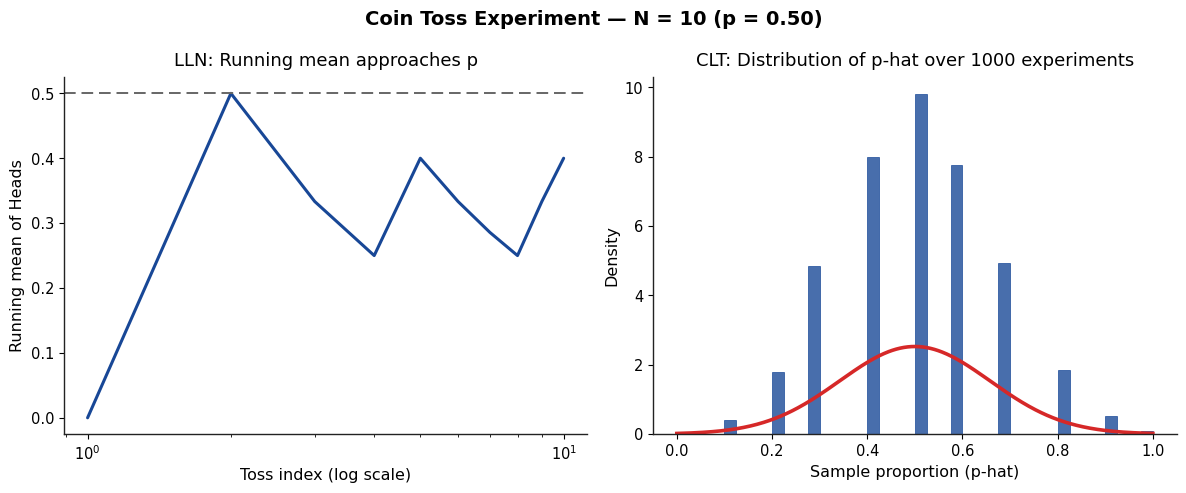

Ready for N = 100 tosses (M = 1000 experiments for CLT). Press <Enter>, or 'q' to quit:  



Results for N = 100: Heads = 42, Tails = 58



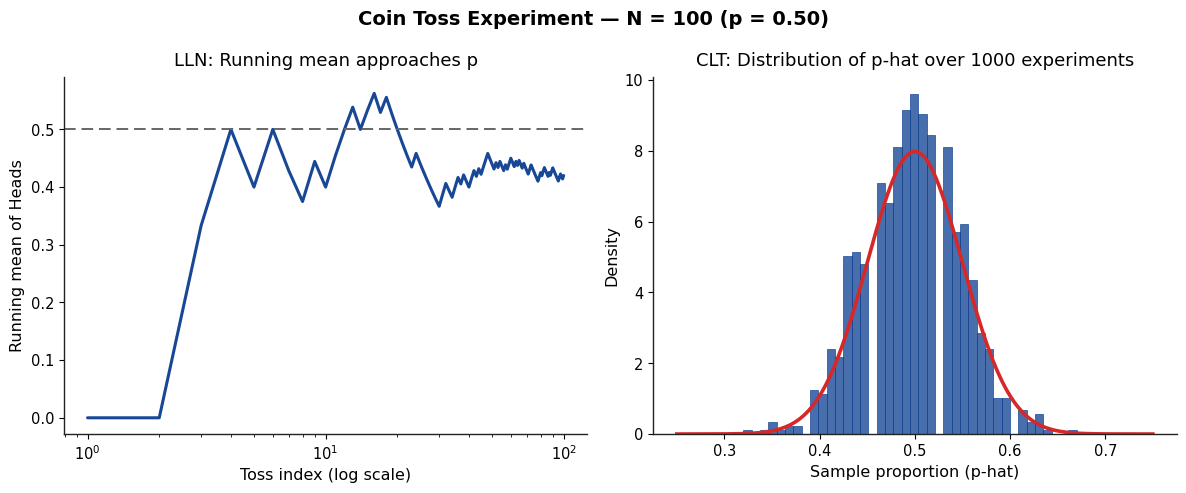

Ready for N = 1000 tosses (M = 1000 experiments for CLT). Press <Enter>, or 'q' to quit:  



Results for N = 1000: Heads = 494, Tails = 506



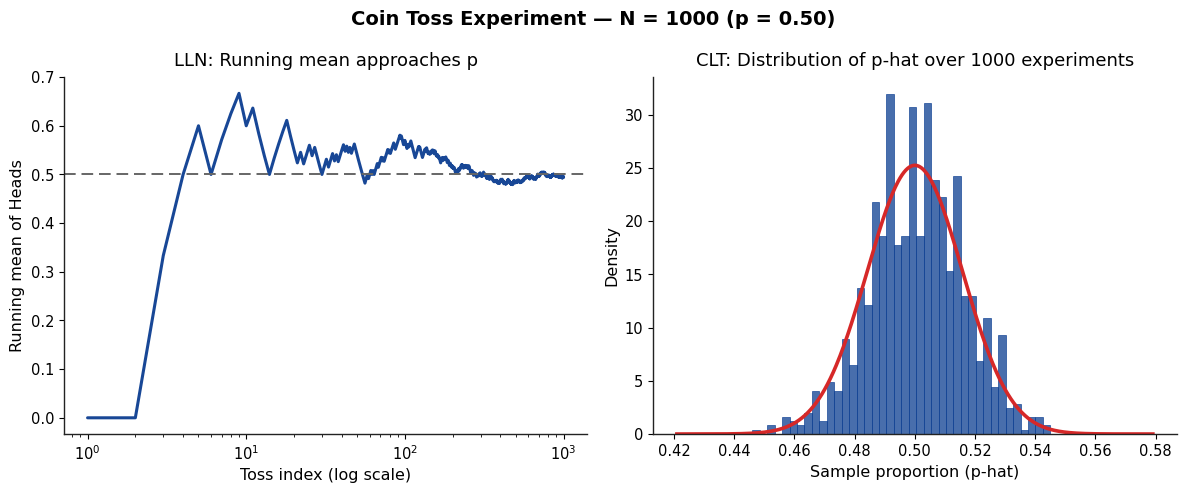

Ready for N = 10000 tosses (M = 1000 experiments for CLT). Press <Enter>, or 'q' to quit:  



Results for N = 10000: Heads = 5048, Tails = 4952



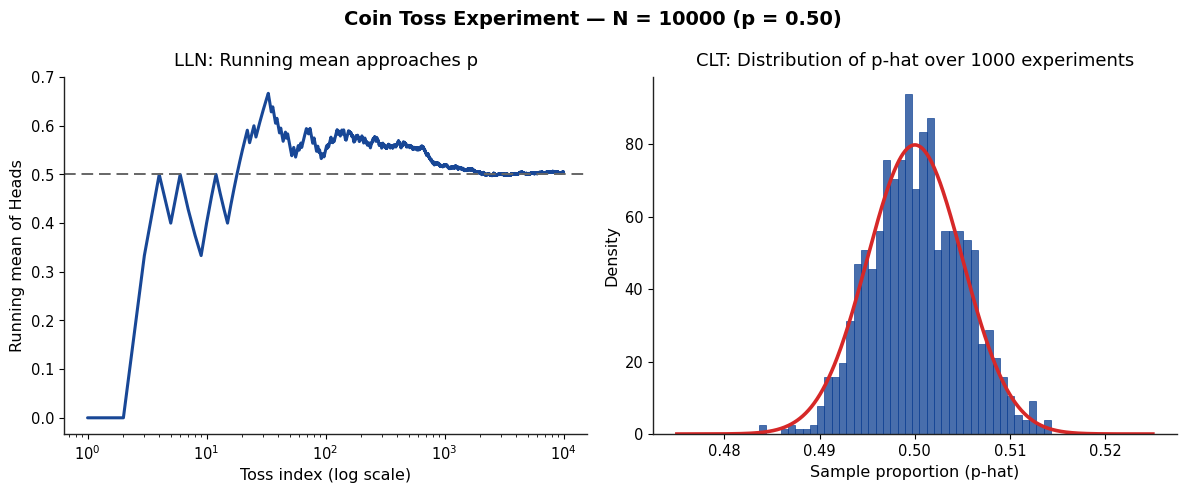

All experiments completed. Exiting.


In [4]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Coin Toss Experiment — LLN & CLT  (Author: Muhammed İkbal Yılmaz)
# Added feature: after each run, print counts of heads/tails
# ============================================================

# ----------------------- Configuration -----------------------
NS = [10, 100, 1_000, 10_000]   # sample sizes per Enter
M_REPS = 1_000                  # number of experiments for the CLT histogram
PROB_HEAD = 0.5                 # fair coin probability
RNG_SEED = 42                   # set None for fresh randomness
BINS = 40                       # histogram bins for p-hat

# Visual palette
DEEP_BLUE = "#0B3D91"
DEEP_BLUE_EDGE = "#0B3D91"
NORMAL_RED = "#D62828"

plt.rcParams.update({
    "figure.figsize": (12, 5),
    "axes.titlesize": 13,
    "axes.labelsize": 11.5,
    "xtick.labelsize": 10.5,
    "ytick.labelsize": 10.5,
    "figure.autolayout": False,
})

rng = np.random.default_rng(RNG_SEED)


# ----------------------- Styling Helpers ---------------------
def style_axes_minimal(ax, keep=("left", "bottom")):
    for side in ("top", "right", "left", "bottom"):
        ax.spines[side].set_visible(False)
    for side in keep:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_linewidth(1.0)
        ax.spines[side].set_color("#222222")
    ax.yaxis.set_ticks_position("left" if "left" in keep else "none")
    ax.xaxis.set_ticks_position("bottom" if "bottom" in keep else "none")
    ax.grid(False)


# ----------------------- Core Logic --------------------------
def single_run_sequence(n: int, p: float = PROB_HEAD, rng=None) -> np.ndarray:
    """Generate one sequence of n coin tosses (1=heads, 0=tails)."""
    if rng is None:
        rng = np.random.default_rng()
    return (rng.random(n) < p).astype(int)

def running_mean_from_sequence(seq: np.ndarray) -> np.ndarray:
    cumsum = np.cumsum(seq)
    k = np.arange(1, len(seq) + 1, dtype=float)
    return cumsum / k

def sampling_distribution_p_hat(n: int, m: int = M_REPS, p: float = PROB_HEAD, rng=None) -> np.ndarray:
    if rng is None:
        rng = np.random.default_rng()
    samples = rng.random((m, n)) < p
    return samples.mean(axis=1).astype(float)

def normal_pdf(x: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    coef = 1.0 / (math.sqrt(2.0 * math.pi) * sigma)
    z = (x - mu) / sigma
    return coef * np.exp(-0.5 * z * z)

def plot_lln_and_clt(seq: np.ndarray, m_reps: int = M_REPS, p: float = PROB_HEAD, rng=None) -> None:
    n = len(seq)
    running_mean = running_mean_from_sequence(seq)
    p_hats = sampling_distribution_p_hat(n, m_reps, p, rng=rng)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Coin Toss Experiment — N = {n} (p = {p:.2f})", y=0.98, fontsize=14, fontweight="600")

    # Panel A: LLN
    ax = axes[0]
    ax.plot(np.arange(1, n + 1), running_mean, linewidth=2.2, color=DEEP_BLUE, solid_capstyle="round", alpha=0.95)
    ax.axhline(p, linestyle="--", linewidth=1.4, color="#666666", dashes=(6, 3))
    ax.set_xscale("log")
    ax.set_xlabel("Toss index (log scale)")
    ax.set_ylabel("Running mean of Heads")
    ax.set_title("LLN: Running mean approaches p", pad=8)
    style_axes_minimal(ax, keep=("left", "bottom"))

    # Panel B: CLT
    ax2 = axes[1]
    ax2.hist(
        p_hats,
        bins=BINS,
        density=True,
        alpha=0.75,
        color=DEEP_BLUE,
        edgecolor=DEEP_BLUE_EDGE,
        linewidth=0.6,
    )
    ax2.set_xlabel("Sample proportion (p-hat)")
    ax2.set_ylabel("Density")
    ax2.set_title(f"CLT: Distribution of p-hat over {m_reps} experiments", pad=8)

    mu = p
    sigma = math.sqrt(p * (1.0 - p) / n)
    x_min = max(0.0, mu - 5 * sigma)
    x_max = min(1.0, mu + 5 * sigma)
    x = np.linspace(x_min, x_max, 500)
    ax2.plot(x, normal_pdf(x, mu, sigma), linewidth=2.6, color=NORMAL_RED)

    style_axes_minimal(ax2, keep=("left", "bottom"))
    fig.tight_layout(pad=1.2)
    plt.show()


# ----------------------- CLI / Interaction -------------------
def main():
    print("\nCoin Toss Experiment — LLN & CLT (Author: Muhammed İkbal Yılmaz)")
    print("Press <Enter> to run the next N, or type 'q' to quit.\n")
    for n in NS:
        msg = input(f"Ready for N = {n} tosses (M = {M_REPS} experiments for CLT). Press <Enter>, or 'q' to quit: ")
        if msg.strip().lower() == "q":
            print("Exiting. Bye!")
            return
        seq = single_run_sequence(n, p=PROB_HEAD, rng=rng)
        heads = int(seq.sum())
        tails = n - heads
        print(f"\nResults for N = {n}: Heads = {heads}, Tails = {tails}\n")
        plot_lln_and_clt(seq, m_reps=M_REPS, p=PROB_HEAD, rng=rng)
    print("All experiments completed. Exiting.")


if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        print("\nInterrupted. Bye!")
        sys.exit(0)


It is observed that as the number of coin tosses increases, the empirical probability of getting heads or tails converges towards the theoretical value of one of the two possible outcomes, namely $0.5$. Formally, by the Law of Large Numbers, $\hat{p}_n = \tfrac{1}{n}\sum_{i=1}^n X_i \to 0.5$ as $n \to \infty$. At the same time, the histogram plots of the sample proportions, although relatively sharp, exhibit a stable distribution that aligns with the Central Limit Theorem, which states that $\hat{p}_n \sim \mathcal{N}(0.5,\,0.25/n)$. Especially after the $10{,}000^\text{th}$ toss, the observed probability essentially settles at $0.5$, confirming that empirical results converge to theoretical expectations as the sample size grows.
